In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [14]:
class BMIState(TypedDict):
    wt: float
    ht: float 
    bmi: float
    cat: str

In [8]:
def calc_bmi(state: BMIState) -> BMIState:
    wt = state['wt']
    ht = state['ht']

    bmi=wt/ht**2 
    state['bmi']=round(bmi,2)
    return state

In [16]:
def label_bmi(state: BMIState) -> BMIState:
    bmi = state['bmi']
    if bmi < 18.5:
        state['cat']="UnderWeight"
    elif bmi < 25:
        state['cat']="Normal"
    else :
        state['cat']="Fat"
    return state

In [17]:
graph=StateGraph(BMIState) # graph defn , state passed

# add nodes
graph.add_node('calc_bmi',calc_bmi)
graph.add_node('label_bmi',label_bmi)
# add edges 
graph.add_edge(START,'calc_bmi')
graph.add_edge('calc_bmi','label_bmi')
graph.add_edge('label_bmi',END)

# compile the graph
workflow = graph.compile()

In [18]:
# execute the graph
output_state = workflow.invoke({'wt':80,'ht':1.73})
print(output_state)

{'wt': 80, 'ht': 1.73, 'bmi': 26.73, 'cat': 'Fat'}


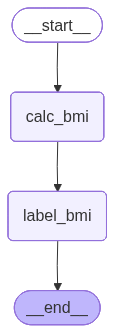

In [19]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())